In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras import datasets
from keras import models
from keras import layers
from keras import utils

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = datasets.boston_housing.load_data()

In [3]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [43]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='elu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [5]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = []
all_mae_history = []

for idx in range(k):
    print 'Processing fold #', idx
    val_data = train_data[idx * num_val_samples : (idx+1) * num_val_samples]
    val_targets = train_targets[idx * num_val_samples : (idx+1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:idx * num_val_samples],
         train_data[(idx+1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:idx * num_val_samples],
         train_targets[(idx+1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_history.append(mae_history)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [6]:
print all_scores
print np.mean(all_scores)

[2.168561313411977, 3.1753348359967224, 2.6893991574202434, 2.2703142248757997]
2.575902382926186


(2.1, 2.8)

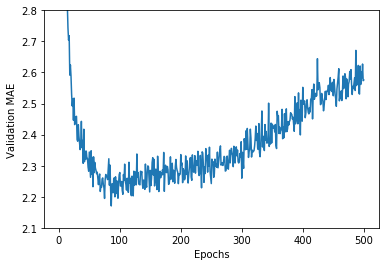

In [11]:
average_mae_history = [np.mean([x[idx] for x in all_mae_history]) for idx in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.ylim([2.1, 2.8])

In [21]:
def smooth_curve(points, factor=0.9):
    smooth_points = [points[0]]
    for point in points[1:]:
        previous = smooth_points[-1]
        smooth_points.append(previous*(1.-factor) + point*(factor))
    return smooth_points

(2.1, 2.8)

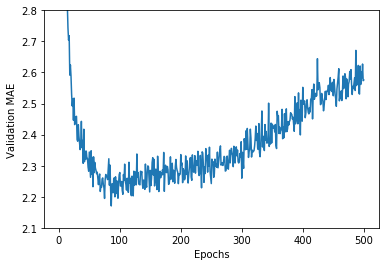

In [27]:
smooth_mae_history = smooth_curve(average_mae_history, 1.)
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.ylim([2.1, 2.8])

In [45]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print test_mse_score, test_mae_score

102/102 [==============================] - 0s 652us/step
15.25368574553845 2.52531286314422
